In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Expectation / Mean  

E = Expectation or Mean of Sample Set ($\Omega$)

### Discrete Random Variables
Given X to be a discrete random variable:  

x, with PMF of $P_x$(x)  is E[X] = $\sum_{i=1}^{x} x * P_x(x)$

#### Example  

x is a Bernoulli Random Variable with PMF of:  

$P_x$(x) = { 0.7 when x =1 and 0.3 when x = 0, then 

$E[X] = 1*0.7 + 0*0.3 = 0.7$


<AxesSubplot:title={'center':'Mean: 1.37413'}, ylabel='Density'>

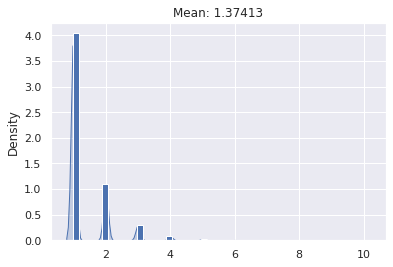

In [2]:
# Mean becomes the expected value, which as N increases, becomes the mean
# Note: for binomial random values, the mean will approach P(x)
p = 0.73
N = 100000
G = np.random.geometric(p, N)
g_mean = G.mean()

ax = plt.axes()
ax.set_title(f'Mean: {g_mean}')
v = plt.hist(G, density=True, bins = 50)
sns.kdeplot(G, shade=True)


### Continuous Random Variables 

Given Y to be a continuous random variable:

Y, with PDF of $F_y$(y) is E[Y] = $\int_1^\infty y * F_y(y)*dy$

## Law of Large Numbers
$x$, $P_x(x)$ as probability distribution function (either discrete or continuous)  

The result of all independent expirements defines the sample space ($\Omega$).  This is also sometimes called I.I.D, identical independent data

Given some distribution with an IID sample, than the expected value of the random number becomes the mean of the $\Omega$ sample set as the size of $\Omega$ increases.

$E[x] = mean(\Omega)$  

### Some Famous Distributions showing the Law of Large Numbers  

| Random Variable | $E[x] / Mean$ | X range | Parameter Range |
| ---------- | ------------ | ---------- | --------- |  
| Bernoulli(p) | $p$ | {0,1} | 0 <= p <= 1 |  
| Binomial(n,p) | $n*p$ | 0 <= x <= n | 0 <= p <= 1, n >= 1 |  
| Geometric(p) | $1 / p$ | x >= 1 | 0 <= p <= 1 | 
| Poisson($\lambda$) | $\lambda$ | x >= 0, 1, 2, ..., $\infty$ | $\lambda$ >= 0 |  
| Normal($\mu$, $\sigma$), aka - Gaussian | $\mu$ | -$\infty$ <= x <= $\infty$ | -$\infty$ <= $\mu$ <= $\infty$, $\sigma$ > 0 |  
| Exponential($\lambda$) | $1 / \lambda$ | x >= 0 | $\lambda$ > 0 |  

## Variance  
Variance ($\sigma$) represents the difference between the expected mean or value ($\mu$) and the real random variable value.

$\sigma^2 = E[(x - \mu)^2]$  

often written as 

$\sigma = \sqrt{E[(x - \mu)^2]}$

## Regression  - Multiple Random Variables  

Given random variables $x_1, x_2, x_3, ...., x_d$ and continuous random variable, $y$  
we look to model the probability of $f_{y|x}(y|\overrightarrow{x})$ with the following:  

$f_{y|x}(y|\overrightarrow{x})$ = $\frac{f_{\overrightarrow{x}|y}(\overrightarrow{x}|y) * P_y(y)}{f_{\overrightarrow{x}}(x)}$  

following:  

$E_{y|x}[y|x] = \int_{0}^y y*f_{y|\overrightarrow{x}}(y|\overrightarrow{x})$

where $E_{y|x}[y|x]$ is the point estimate based upon the values of $\overrightarrow{x}$  

## Parametric Distribution  

Any distribution function (PMA or PDF) that takes parameters, such as:  

normal($\mu$, $\sigma$)  
exp($\lambda$)  
geometric(p)  
binomial(n,p)  

The goal of estimation is to determine these parameters as those will give us the full probability model of the data.  

Note:  there are non-parametric distributions, which can be solved via kernal density estimates, think sns.kdeplot function for plotting.

## Parametric Distribution Estimation  

### Maximum Likelihood Estimate (MLE)  
Assumptions: 
1. Independent Data
2. Identical Distribution 

Given:  
Samples ($\overrightarrow{S}$): $[s_1, s_2, s_3, ...., s_n]$  

where the distribution of $s_1$ = $f_{\overrightarrow{X}}(\overrightarrow{x})$ 

then we know:  

$f(s_1, s_2, s_3, ...., s_n|a,b,c) = f_x(s_1) * f_x(s_2) * f_x(s_3) * ... * f_x(s_n)$  

what are the values of the parametric distribution that maximizes the probability functions?  

#### Log Likelihood for Exponential Distributions  
Assuming independent and identically distributed amples ($S$) of data $x_1,x_2,x_3,....,x_n$  

Reminder: for exponential distribution:  

$f_x(x) = \lambda*e^{-\lambda*x}$  

Goal is then to determine the maximum $\lambda$ value of the distribution.  

The MLE equation, $L$, is then the following:  

1.  $L(\lambda) = \lambda*e^{-\lambda*x_1} * \lambda*e^{-\lambda*x_2} * ..... * \lambda*e^{-\lambda*x_n}$  
2.  $L(\lambda) = \lambda^n * e^{-\lambda(x_1 + x_2 + x_3 + .... + x_n)}$  

rewriting such that $s$ = $x_1 + x_2 + x_3 + ... + x_n$ yeilds the following:

3.  $L(\lambda) = \lambda^n * e^{-\lambda*s}$
4.  $log_e(L(\lambda)) = log_e(\lambda^n * e^{-\lambda*s})$  
5.  $log_e(L(\lambda)) = (n*log_e(\lambda)) - (\lambda*s)$  
6.  Taking the derivitive of $(n*log_e(\lambda)) - (\lambda*s)$, yeilds $\frac{n}{\lambda} - s = 0$

Now to maximize $\lambda$, we get the following:  

$\lambda = \frac{n}{s}$  

### Maximum A Posterior (MAP) Estimator  

This estimator assumes the parameters of the density functions, like $\lambda, \mu$, or $\sigma$ are random variables themselves.

For example, with the exponential distribution function  

$f_x(x) = \lambda * e^{-\lambda*x}$ 

we consider $\lambda$ itself as a random variable with its own distribution function, which is maximized as:  

$f_{\lambda}(\lambda|x) = \Pi(i=1,n)( f_x(x_i) * f_{\lambda}(\lambda)$  

where $\Pi$ represents the maximum value of $\lambda$ across each element $i$ of $n$ samples or data points